In [2]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import numpy as np
data_frame=pd.read_csv("bank-hw1.csv")

In [4]:
#For Age column:
data_frame['age'].loc[(data_frame['age']<18)]=18
data_frame['age'].loc[(data_frame['age']>100)]=100

# For Job:
data_frame['job'].loc[data_frame['job'].str.contains('\.',na=True)]=data_frame['job'].str.slice(0,-1)
data_frame['job']=data_frame['job'].str.replace(r'\W',"")


#For Marital:
data_frame['marital'] = data_frame['marital'].replace(['div','Div'],'divorced')
data_frame['marital'] = data_frame['marital'].replace(['M',"Married","maried","mairied","marirred"],'married')
data_frame['marital'] = data_frame['marital'].replace("Single",'single')
data_frame = data_frame[data_frame['marital']!='1']

#For day
data_frame=data_frame[data_frame['day'].str.len()<=2]

#For Month
data_frame['month'] = data_frame['month'].replace(['August','august'],'aug')
data_frame=data_frame[~data_frame['month'].isin(['27-Aug','8-Aug'])]

#For Duration:
data_frame['duration'][data_frame['duration']<0]=0

#For Balance
data_frame['balance'][data_frame['balance']<0]=0


C:\Users\rmste\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\rmste\AppData\Local\Temp/ipykernel_7636/3822202146.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame['job']=data_frame['job'].str.replace(r'\W',"")


In [5]:
#Encoding Job Column
data_frame=data_frame[data_frame['job'].notna()]
data_frame=data_frame[data_frame['job']!='unknown']

from sklearn.preprocessing import LabelEncoder
encoder2 = LabelEncoder()
data_frame['ENCODED_JOB'] = encoder2.fit_transform(data_frame['job'])

#Encoding marital column:
data_frame['ENCODED_MARITAL'] = encoder2.fit_transform(data_frame['marital'])

#Encoded education column:
data_frame=data_frame[data_frame['education'].notna()]
Educational_dict = {'primary' : 1,'secondary' : 2,'tertiary' :3}
data_frame['ENCODED_EDUCATION'] = data_frame['education'].map(Educational_dict)

#Encoding default column:
from sklearn.preprocessing import LabelBinarizer
encoder1 = LabelBinarizer()
data_frame['ENCODED_DEFAULT']=encoder1.fit_transform(data_frame['default'].values.reshape(-1,1))

#Encoding housing column:
data_frame['ENCODED_HOUSING']=encoder1.fit_transform(data_frame['housing'].values.reshape(-1,1))

#Encoding Contact column:
data_frame['ENCODED_CONTACT'] = encoder2.fit_transform(data_frame['contact'])

#Encoding P_outcome
data_frame['ENCODED_POUTCOME'] = encoder2.fit_transform(data_frame['poutcome'])

#Encodin months
months_dict = {'jan' : 1,'feb' : 2,'mar' :3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
data_frame['ENCODED_MONTHS'] = data_frame['month'].map(months_dict)


#Encodin y
data_frame['ENCODED_Y']=encoder1.fit_transform(data_frame['y'].values.reshape(-1,1))

In [7]:
data_frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,ENCODED_JOB,ENCODED_MARITAL,ENCODED_EDUCATION,ENCODED_DEFAULT,ENCODED_HOUSING,ENCODED_CONTACT,ENCODED_POUTCOME,ENCODED_MONTHS,ENCODED_Y
0,47,management,married,tertiary,no,0,yes,yes,cellular,27,...,no,5,1,3,0,1,0,2,8,0
1,42,management,married,tertiary,no,0,no,no,cellular,26,...,no,5,1,3,0,0,0,2,8,0
2,25,student,single,secondary,no,154,no,no,cellular,2,...,yes,9,2,2,0,0,0,1,9,1
3,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,...,no,4,0,2,0,0,1,2,2,0
4,25,bluecollar,single,primary,no,0,yes,no,unknown,23,...,no,2,2,1,0,1,2,2,5,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(5, 10))

data_frame[['S_age','S_balance','S_day','S_duration','S_pdays','S_previous','S_ENCODED_MONTHS']]=min_max.fit_transform(data_frame[['age','balance','day','duration','pdays','previous','ENCODED_MONTHS']])

In [15]:
data_frame

,age,job,marital,education,default,balance,housing,loan,contact,day,...,ENCODED_POUTCOME,ENCODED_MONTHS,ENCODED_Y,S_age,S_balance,S_day,S_duration,S_pdays,S_previous,S_ENCODED_MONTHS
0,47,management,married,tertiary,no,0,yes,yes,cellular,27,...,2,8,0,6.768293,5.000000,9.333333,5.168573,5.000000,5.000000,8.181818
1,42,management,married,tertiary,no,0,no,no,cellular,26,...,2,8,0,6.463415,5.000000,9.166667,5.269416,5.000000,5.000000,8.181818
2,25,student,single,secondary,no,154,no,no,cellular,2,...,1,9,1,5.426829,5.013549,5.166667,5.574955,6.112455,5.405405,8.636364
3,49,housemaid,divorced,secondary,no,267,no,no,telephone,9,...,2,2,0,6.890244,5.023491,6.333333,5.034618,5.000000,5.000000,5.454545
4,25,bluecollar,single,primary,no,0,yes,no,unknown,23,...,2,5,0,5.426829,5.000000,8.666667,5.376279,5.000000,5.000000,6.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,29,selfemployed,single,tertiary,no,270,yes,no,cellular,15,...,0,10,0,5.670732,5.023755,7.333333,5.141481,6.662636,6.486486,9.090909
2247,55,technician,divorced,secondary,no,3450,no,no,cellular,11,...,2,8,0,7.256098,5.303532,6.666667,5.165563,5.000000,5.000000,8.181818
2248,31,management,single,tertiary,no,0,yes,no,cellular,15,...,2,4,0,5.792683,5.000000,7.333333,5.278447,5.000000,5.000000,6.363636
2249,49,entrepreneur,married,secondary,no,2655,no,no,cellular,17,...,2,11,0,6.890244,5.233587,7.666667,5.094822,5.000000,5.000000,9.545455


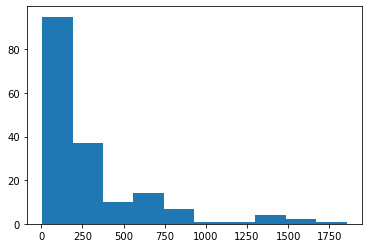

290.43023255813955

In [18]:
## Your code for HP 3 goes here. 
import matplotlib.pyplot as plt
import numpy as np

x = data_frame['duration'][data_frame['month']=='nov']

plt.hist(x)
plt.show() 



data_frame['duration'][data_frame['month']=='nov'].mean()